In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [279]:
titanic_csv = '../DATA/titanic_train.csv'
titanic = pd.read_csv('C:/Users/Perrine Mignot/Downloads/titanic.csv')

Exploring data

In [280]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [281]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

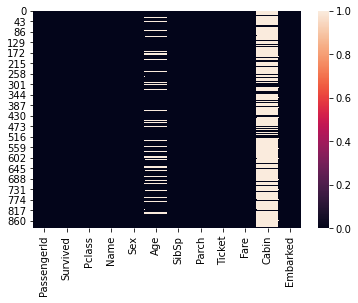

In [282]:
sns.heatmap(titanic.isnull())

AttributeError: module 'seaborn' has no attribute 'xlabel'

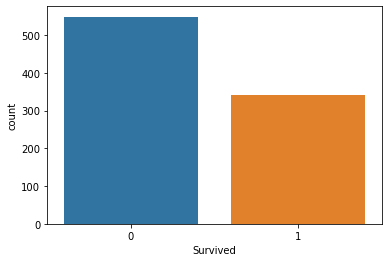

In [283]:
sns.countplot(x='Survived',data=titanic)
sns.xlabel('survived','died')

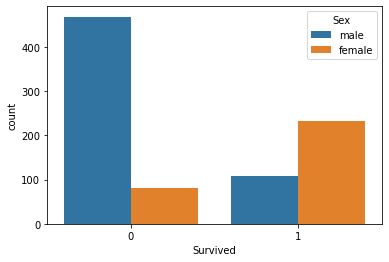

In [284]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

In [285]:
# more females survived than males.

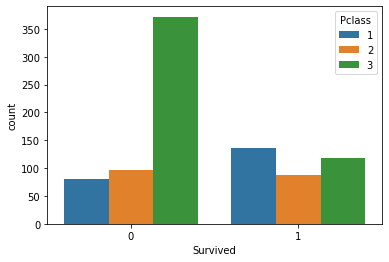

In [286]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

In [287]:
# passengers belonging to class 3 died the most.

Data Cleaning

In [288]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [289]:
# replace missing age value with age mean

In [290]:
titanic.Age.mean()

29.69911764705882

In [291]:
# finding out more about the missing values to decide what to do 
titanic_missing = titanic.loc[titanic.Age == 0]

In [292]:
# why isn't this returning the sum of missing age values so 177? 
# I would then like to use this new dataset to find out which class does the msising values belong to but first I need to be able to isolate them.
# Can you please help? :-)
titanic_missing.Age.sum()

0.0

In [293]:
titanic.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [294]:
# imputing the age using the mean of the age column

In [295]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(np.array(titanic['Age']).reshape(-1,1))
#imp_mean.fit_transform(titanic.Age))
print(imp_mean.transform(np.array(titanic.Age).reshape(-1,1)))

[[22.        ]
 [38.        ]
 [26.        ]
 [35.        ]
 [35.        ]
 [29.69911765]
 [54.        ]
 [ 2.        ]
 [27.        ]
 [14.        ]
 [ 4.        ]
 [58.        ]
 [20.        ]
 [39.        ]
 [14.        ]
 [55.        ]
 [ 2.        ]
 [29.69911765]
 [31.        ]
 [29.69911765]
 [35.        ]
 [34.        ]
 [15.        ]
 [28.        ]
 [ 8.        ]
 [38.        ]
 [29.69911765]
 [19.        ]
 [29.69911765]
 [29.69911765]
 [40.        ]
 [29.69911765]
 [29.69911765]
 [66.        ]
 [28.        ]
 [42.        ]
 [29.69911765]
 [21.        ]
 [18.        ]
 [14.        ]
 [40.        ]
 [27.        ]
 [29.69911765]
 [ 3.        ]
 [19.        ]
 [29.69911765]
 [29.69911765]
 [29.69911765]
 [29.69911765]
 [18.        ]
 [ 7.        ]
 [21.        ]
 [49.        ]
 [29.        ]
 [65.        ]
 [29.69911765]
 [21.        ]
 [28.5       ]
 [ 5.        ]
 [11.        ]
 [22.        ]
 [38.        ]
 [45.        ]
 [ 4.        ]
 [29.69911765]
 [29.69911765]
 [29.     

In [296]:
age_imputes = imp_mean.transform(np.array(titanic.Age).reshape(-1,1))
print(type(age_imputes))
print(age_imputes.shape)

<class 'numpy.ndarray'>
(891, 1)


In [297]:
titanic['Age']= age_imputes

In [298]:
titanic['Age'].isna().sum()

0

In [299]:
titanic.Age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

In [300]:
titanic.Age.mean()

29.69911764705882

In [301]:
# replace age by pclass and sex mean values now on titanic2

In [302]:
titanic2 = titanic

In [303]:
by_sex_class = titanic2.groupby(['Sex','Pclass'])

In [304]:
titanic2.groupby(['Sex','Pclass'])['Age'].median()

Sex     Pclass
female  1         32.500000
        2         28.500000
        3         28.000000
male    1         36.000000
        2         29.699118
        3         29.699118
Name: Age, dtype: float64

In [305]:
def impute_median(series):
    return series.fillna(series.median())

In [306]:
titanic2.Age = by_sex_class.Age.transform(impute_median)

In [307]:
titanic2.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q


In [308]:
titanic2.Age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

In [309]:
titanic2['Age'].isna().sum()

0

In [310]:
titanic2.Age.mean()

29.69911764705882

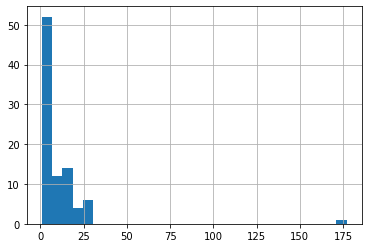

In [311]:
titanic2.Age.value_counts().hist(bins = 30)

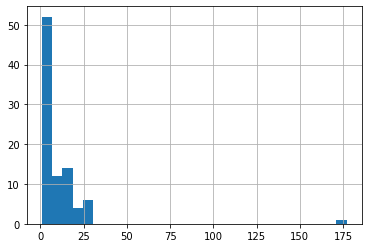

In [312]:
titanic.Age.value_counts().hist(bins = 30)

In [313]:
# Why is the data for Age missing values replaced with the exact same values when we used 2 different functions to replace Age missing value? 
# I would like to know if it's because all the missing values are for man from class 2 or 3 but I couldn't isolate them at the top.

In [315]:
# Now Let’s go ahead and drop the Cabin column.

In [316]:
titanic.drop('Cabin',axis=1,inplace=True)

Converting Categorical Features

Here, we are dummying the sex and embark columns. After dummying, we will drop the rest of the columns which are not needed. (sex and embarked aren't needed as they are the original ones)

In [317]:
sex = pd.get_dummies(titanic['Sex'])
embark = pd.get_dummies(titanic['Embarked'])

In [318]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [319]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


We will concatenate the new sex and embarked columns to the dataframe.

In [320]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [321]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


Test Train Split

In [322]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), titanic['Survived'], test_size=0.30, random_state = 42)                

Training and Predicting

In [323]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=5000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

Evaluation

In [324]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



In [328]:
# doing the regression on dataset titanic2 - we should get the same results though as the missing values were replaced with the exaxct same values.

In [329]:
titanic2.head()
# why are sex and embark columns gone? I didn't drop them!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [330]:
# Test Train Split dataset2

In [331]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(titanic2.drop('Survived',axis=1), titanic2['Survived'], test_size=0.30, random_state = 42)                

In [332]:
# training and predicting model2
from sklearn.linear_model import LogisticRegression
logmodel2 = LogisticRegression(max_iter=5000)
logmodel2.fit(X2_train,y2_train)
predictions = logmodel2.predict(X2_test)

In [333]:
#evaluation model2
from sklearn.metrics import classification_report
print(classification_report(y2_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       157
           1       0.78      0.47      0.58       111

    accuracy                           0.72       268
   macro avg       0.74      0.69      0.69       268
weighted avg       0.74      0.72      0.71       268



In [ ]:
# the result is lower because the columns sex and embark are gone somehow! 
# I just wanted to compare the model with different age values but somehow I have lost 2 columns